# Cosmic Impacts

Without using machine learning, you have to try and characterise incoming particle detections as either cosmic rays (originating outside the solar system, often from distant supernova) or as stellar ejecta (particle spat out by the sun).

For this test, you only have one particle to classify, which impacted with an energy of 1200 MeV.

To help you out, you have a dataset containing stellar ejecta and cosmic rays, located in `cosmic_data.txt`. It contains two columns, the first, the energy of the impact in MeV, and the second the probability it was from solar ejecta.

In [28]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st

data = np.loadtxt('cosmic_data.txt')
test = 1200
print(data.shape)
print(data[:2, :])

(20000, 2)
[[1.1943876e+03 1.1170000e-01]
 [1.2317047e+03 4.5040000e-01]]


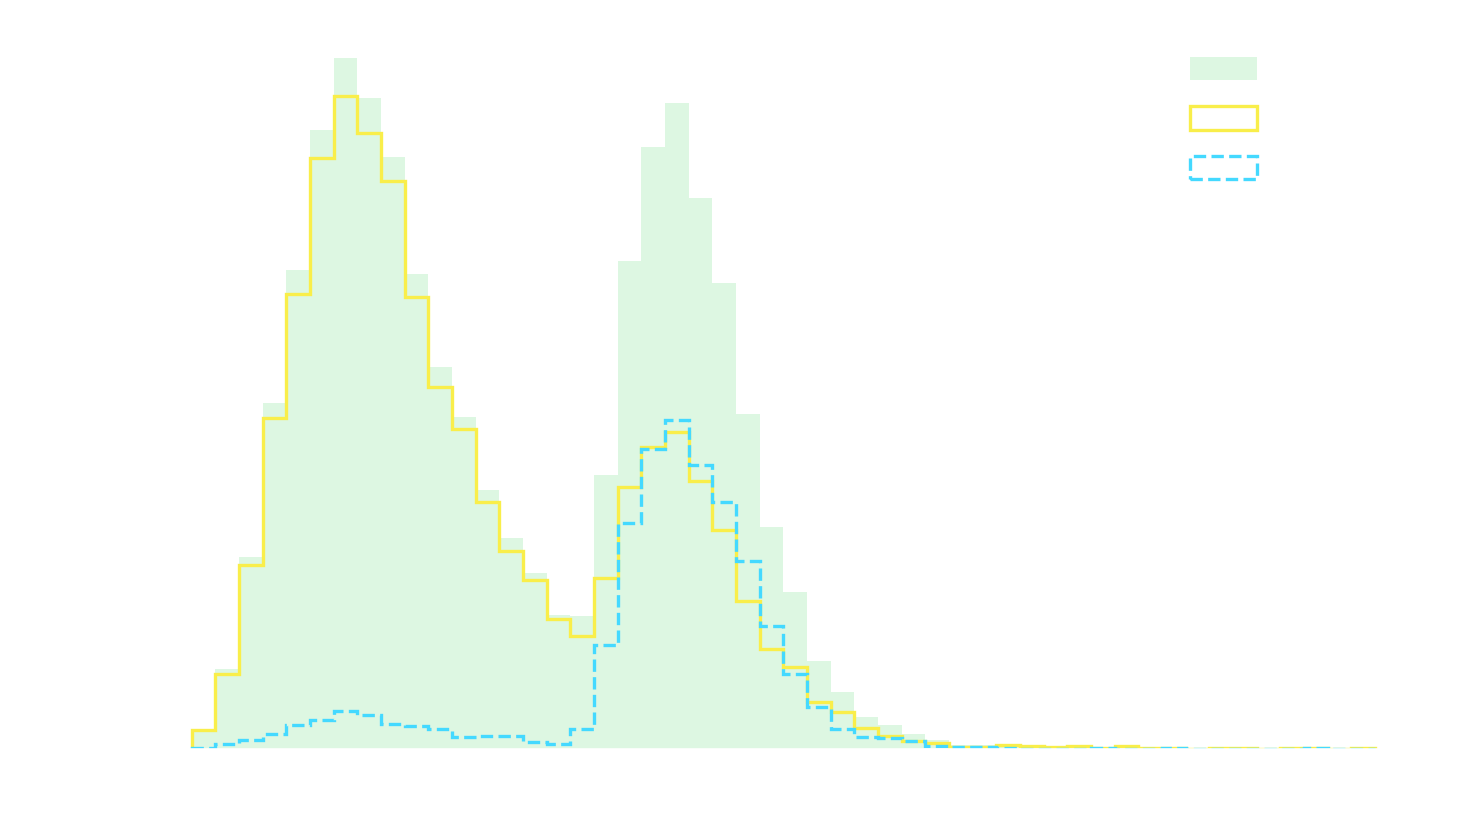

In [29]:
stellar, cosmic = data[:, 0][data[:, 1] > 0.5], data[:, 0][data[:, 1] < 0.5]

_, bins, _ = plt.hist(data[:,0], alpha=0.2, label='All')
plt.hist(stellar, bins=bins, histtype='step', label='Stellar')
plt.hist(cosmic, bins=bins, histtype='step', label='Cosmic')
plt.legend();

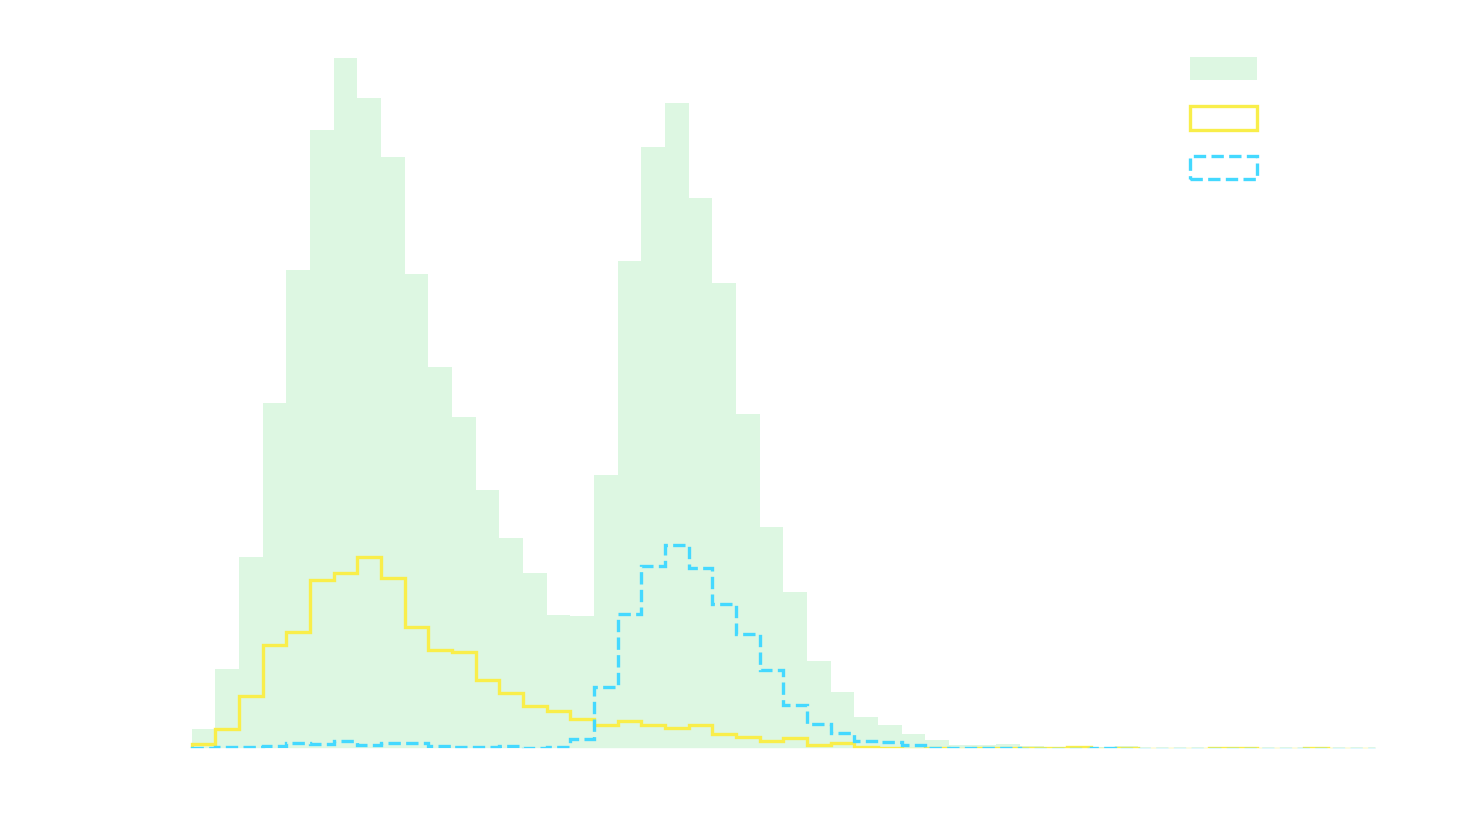

In [30]:
stellar, cosmic = data[:, 0][data[:, 1] > 0.9], data[:, 0][data[:, 1] < 0.1]

_, bins, _ = plt.hist(data[:,0], alpha=0.2, label='All')
plt.hist(stellar, bins=bins, histtype='step', label='Stellar')
plt.hist(cosmic, bins=bins, histtype='step', label='Cosmic')
plt.legend();

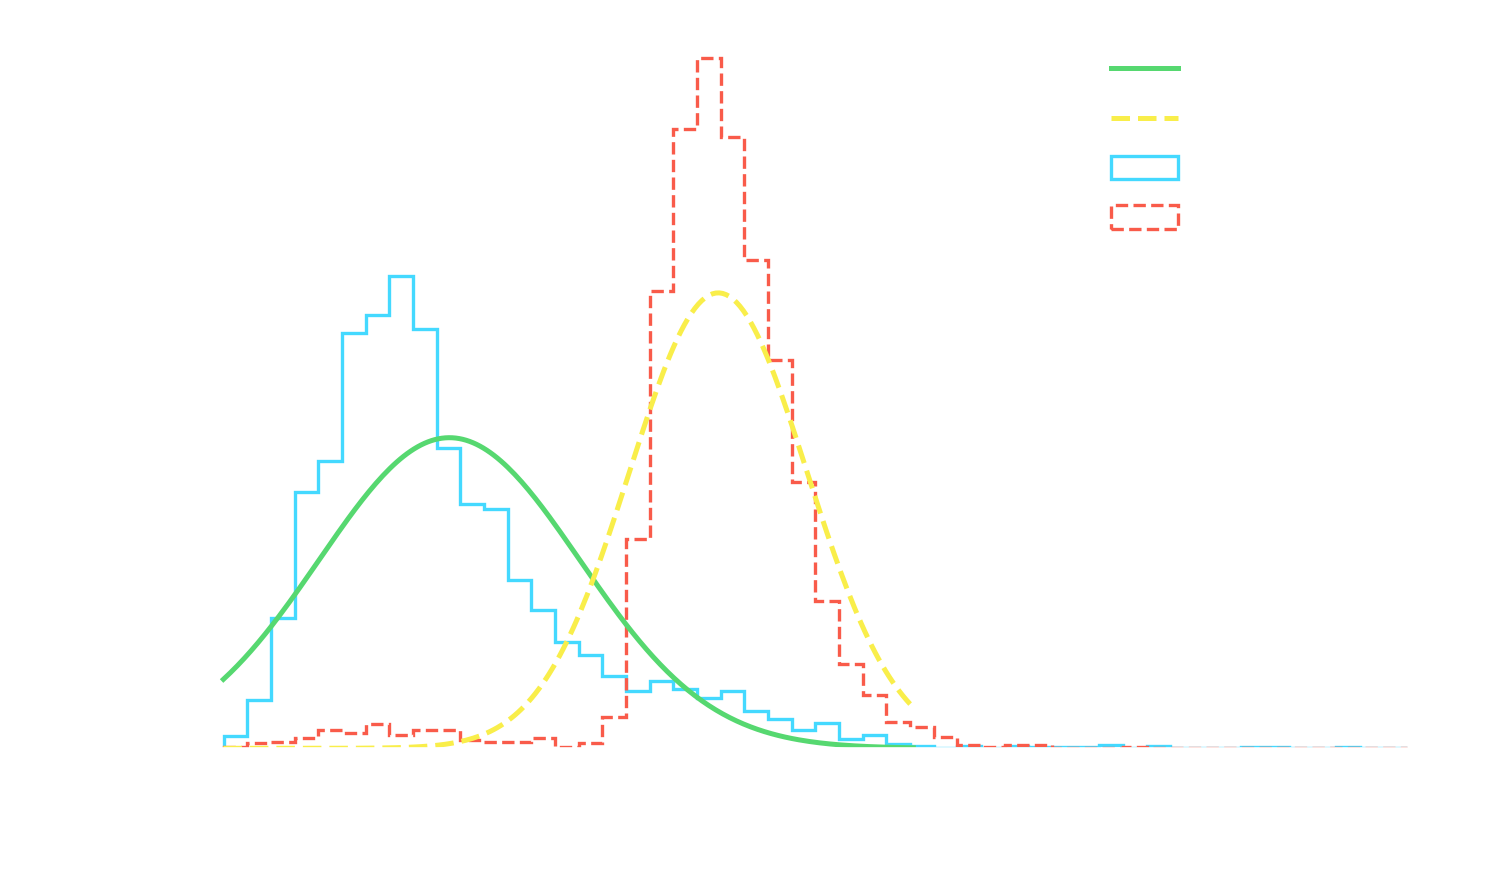

In [31]:
param_s = st.norm.fit(stellar)
param_c = st.norm.fit(cosmic)

#visualize
xs = np.linspace(0, 1500, 200)
p_s = st.norm.pdf(xs, *param_s)
p_c = st.norm.pdf(xs, *param_c)
plt.plot(xs, p_s, label="Stellar Model")
plt.plot(xs, p_c, label="Cosmic Model")
plt.hist(stellar, bins=bins, histtype='step', density=True, label='Stellar Data')
plt.hist(cosmic, bins=bins, histtype='step', density=True, label='Cosmic Data')
plt.legend()
plt.xlabel('Energy (MeV)');

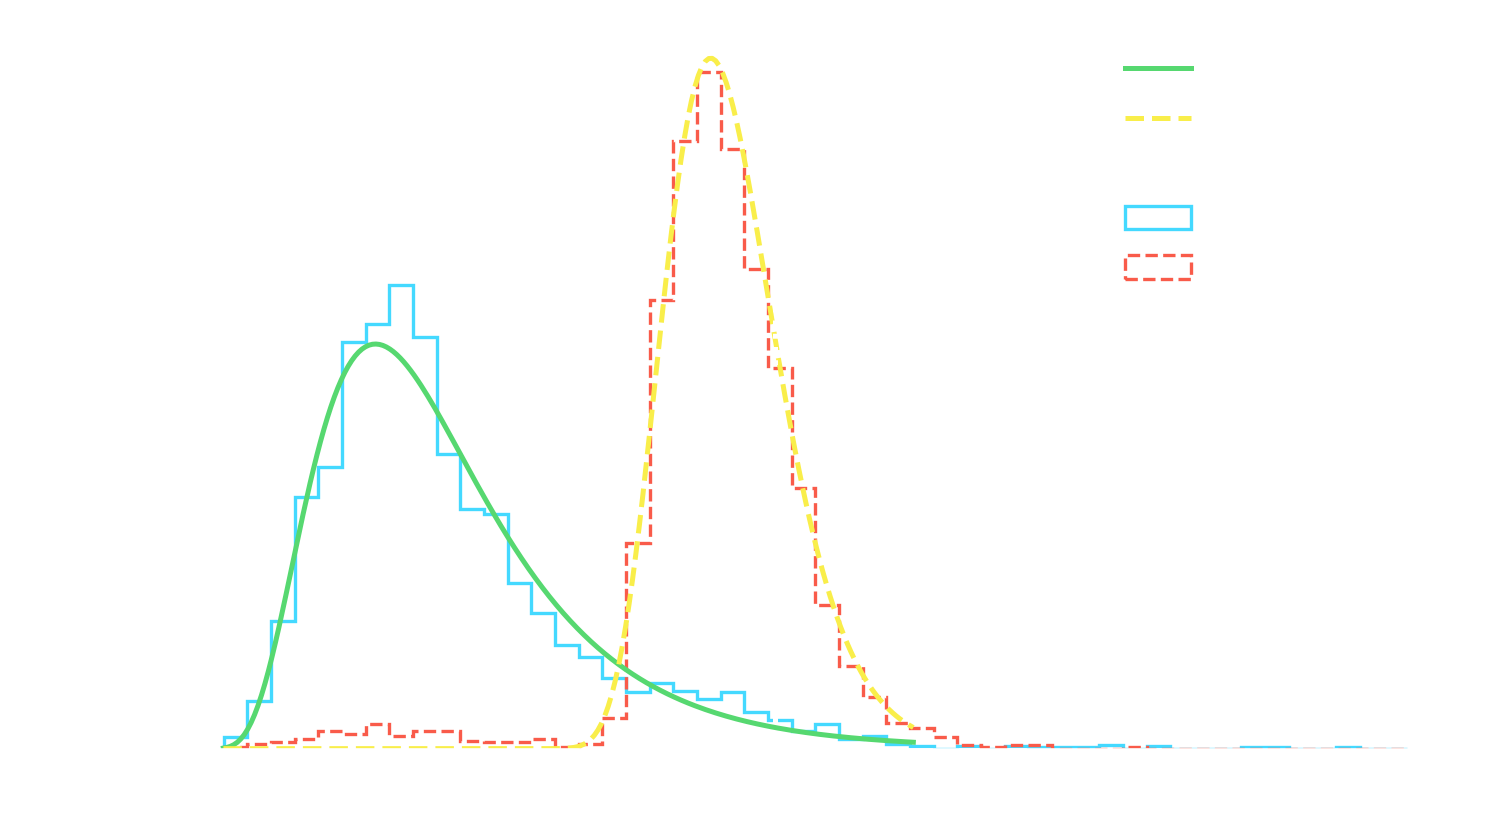

In [46]:
# Testing normals
params_s = st.lognorm.fit(stellar, loc=400, scale=100)
cosmic2 = cosmic[cosmic > 700]
params_c = st.lognorm.fit(cosmic2, loc=1300, scale=100)

# visualise
xs = np.linspace(0, 1500, 200)
p_s = st.lognorm.pdf(xs, *params_s)
p_c = st.lognorm.pdf(xs, *params_c)
plt.plot(xs, p_s, label="Stellar Model")
plt.plot(xs, p_c, label="Cosmic Data")
plt.hist(stellar, bins=bins, histtype="step", density=True, label="Stellar Data")
plt.hist(cosmic, bins=bins, histtype="step", density=True, label="Cosmic Data")
plt.axvline(test, ls=":", label="Test particle")
plt.legend();

In [48]:
n_stellar, n_cosmic = stellar.shape[0], cosmic.shape[0]
#relative probability of each one, as total == 1;
prob_cosmic = st.lognorm.pdf(test, *params_c) * n_cosmic
prob_stellar = st.lognorm.pdf(test, *params_s) * n_stellar
total_prob = prob_cosmic + prob_stellar
final = prob_cosmic / total_prob
print(f"The final probability of this being a cosmic ray is {100 * final:.1f}%")

The final probability of this being a cosmic ray is 93.4%


In [50]:
st.lognorm.pdf(test, *params_c)

0.0018876217285153077